Import Dependencies 

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Import the dataset


In [191]:
insdata=pd.read_csv('insurance.csv')
insdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [192]:
insdata.shape # Check the shape of the dataset

(1338, 7)

In [193]:
insdata.isnull().sum() # Check for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis 


In [194]:
insdata.describe() # Get a statistical summary of the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Age distrbution Analysis


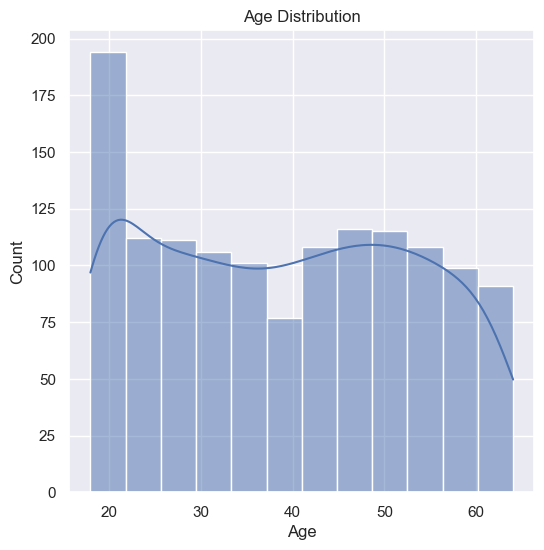

In [195]:
# Set the style
sns.set_theme()

# Create the plot
plt.figure(figsize=(6, 6))
sns.histplot(data=insdata, x='age', kde=True)  # Using histplot instead of displot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

Gender Distribution analysis

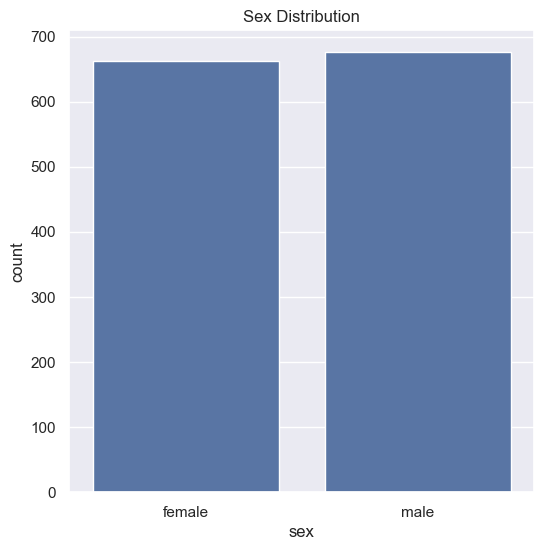

In [196]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insdata)
plt.title('Sex Distribution')
plt.show()

In [197]:
insdata['sex'].value_counts()       

sex
male      676
female    662
Name: count, dtype: int64

BMI analysis

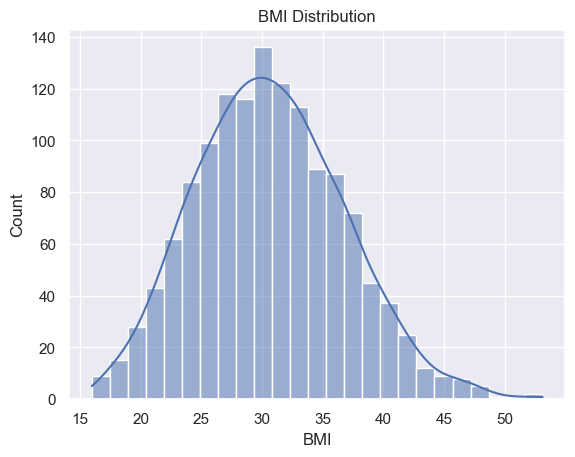

In [198]:
sns.histplot(data=insdata, x='bmi', kde=True)  # Using histplot instead of displot
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

Children data analysis


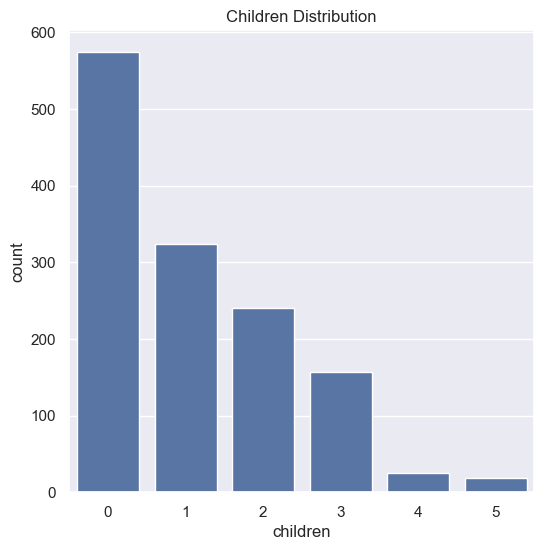

In [199]:
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=insdata)
plt.title('Children Distribution')
plt.show()

In [200]:
insdata['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Smoker Analysis

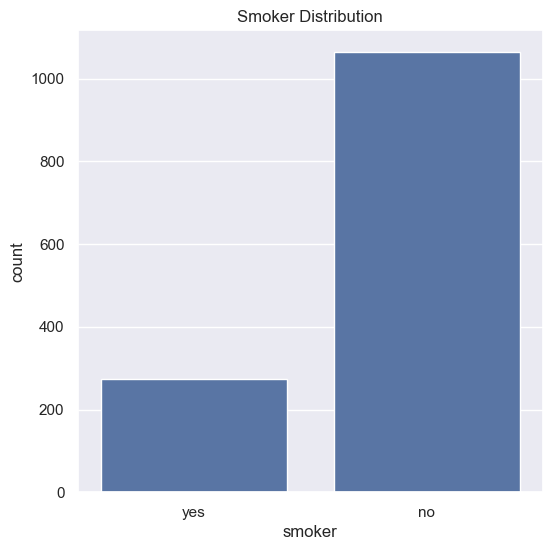

In [201]:
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insdata)
plt.title('Smoker Distribution')
plt.show()

Region analysis

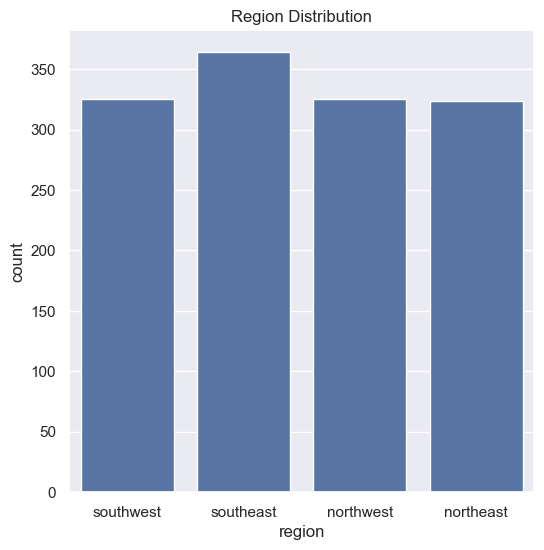

In [202]:
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=insdata)
plt.title('Region Distribution')
plt.show()

Charges Distribution

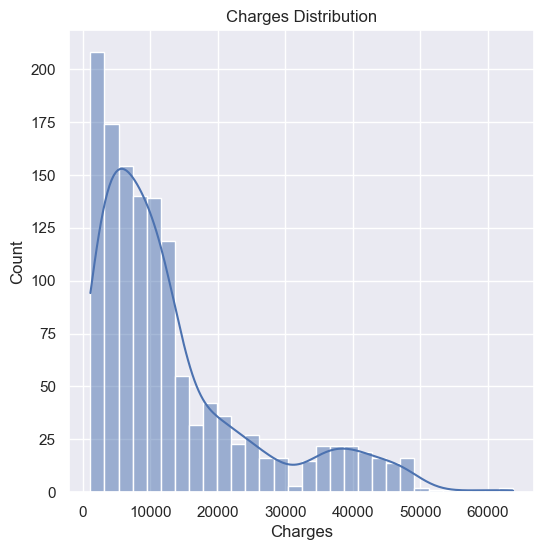

In [203]:
# Set the style
sns.set_theme()

# Create the plot
plt.figure(figsize=(6, 6))
sns.histplot(data=insdata, x='charges', kde=True)  # Using histplot instead of displot
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.show()

Data Preprocessing


In [204]:
#Encoding categorical variables
insdata.replace({'sex':{'male':0 , 'female':1}},inplace=True)
insdata.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
insdata.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

C:\Users\thuka\AppData\Local\Temp\ipykernel_5360\2969859626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insdata.replace({'sex':{'male':0 , 'female':1}},inplace=True)
C:\Users\thuka\AppData\Local\Temp\ipykernel_5360\2969859626.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insdata.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
C:\Users\thuka\AppData\Local\Temp\ipykernel_5360\2969859626.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

Splitting the features and targets 

In [205]:
x=insdata.drop(columns=['charges'],axis=1)
y=insdata['charges']

In [206]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [207]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data Train and Test Data

In [208]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

Model Training

In [209]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [210]:
traindp=model.predict(X_train)

In [211]:
rsqaruredtrain=metrics.r2_score(y_train, traindp)
print("R squared value for training data:", rsqaruredtrain)

R squared value for training data: 0.7528965344026


In [212]:
testdp=model.predict(X_test)

In [213]:
rsquaredtest=metrics.r2_score(y_test, testdp)
print("R squared value for test data:", rsquaredtest)

R squared value for test data: 0.7398369165415872


Building a predictive systen

In [215]:
age=int(input("Enter age: "))
print(age)
gender=input("Enter your Gender (male/female): ").lower()
print(gender)
bmi=float(input("Enter your BMI: "))
print(bmi)
children=int(input("Enter number of children: "))
print(children)
smoker=input("Are you a smoker? (yes/no): ").lower()
print(smoker)
region=input("Enter your region (southeast/southwest/northeast/northwest): ").lower()
print(region)
data = pd.DataFrame({
    'age': [age],
    'sex': [gender],
    'bmi': [bmi],
    'children': [children],
    'smoker': [smoker],
    'region': [region]  
})
data.replace({'sex':{'male':0 , 'female':1}}, inplace=True)
data.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

prediction = model.predict(data)
print("\nPredicted Insurance Cost: ${:.2f}".format(prediction[0]))


46
female
33.44
1
no
southeast

Predicted Insurance Cost: $10674.45


C:\Users\thuka\AppData\Local\Temp\ipykernel_5360\3324524011.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0 , 'female':1}}, inplace=True)
C:\Users\thuka\AppData\Local\Temp\ipykernel_5360\3324524011.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
C:\Users\thuka\AppData\Local\Temp\ipykernel_5360\3324524011.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beha